<a href="https://colab.research.google.com/github/Sjleerodls/Data_Analysis/blob/main/lab_da/ml10_decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report

# 데이터 셋

wine 데이터 셋

In [9]:
wine_csv = 'https://bit.ly/wine_csv_data'

In [10]:
wine_df = pd.read_csv(wine_csv)

In [14]:
wine_df.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [18]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [19]:
wine_df.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [32]:
class_counts = wine_df['class'].value_counts()
class_counts        #> 0 - red wine, 1 - white wine

,count
class,
1.0,4898
0.0,1599


In [34]:
# class 0, 1에 와인 이름 변환
wine_df['class'] = wine_df['class'].map({0 : 'red wine', 1 : 'white wine'})

## alcohol, sugar, pH 변수들의 히스토그램

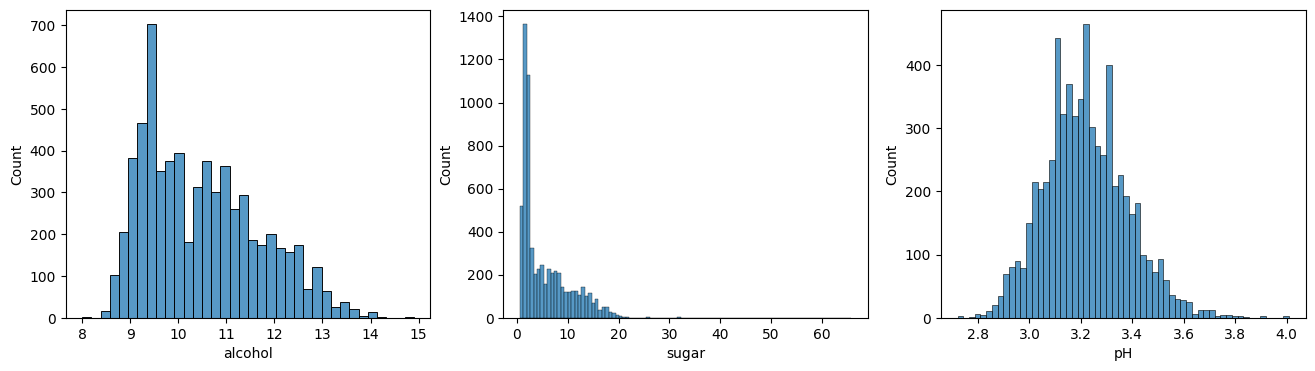

In [43]:
fig, axes = plt.subplots(ncols=3, figsize=(16, 4))

for i, v in enumerate(wine_df.columns[:3]):
    sns.histplot(data=wine_df, x=v, ax=axes[i])

plt.show()

## class 별로 색깔을 다르게 시각화한 pairplot

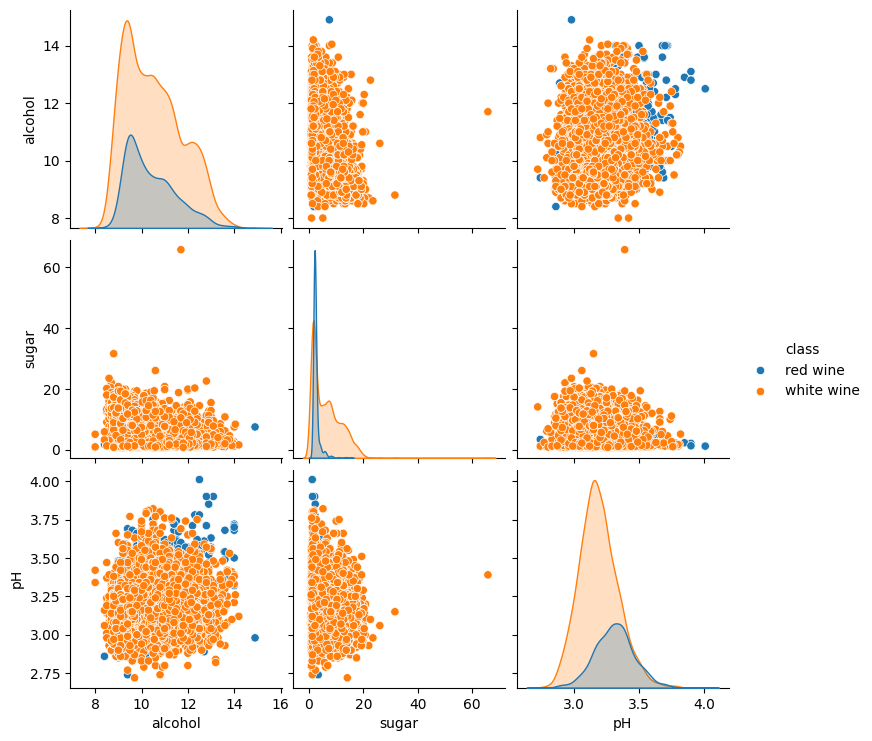

In [36]:
sns.pairplot(wine_df, hue='class')

plt.show()

white wine이 거의 다 뒤덮었다고 볼 수 있음.

# 훈련/테스트 셋 나누기

In [50]:
X = wine_df[wine_df.columns[:3]].values # 특성 배열(alcohol, sugar, pH)
y = wine_df['class'].values

In [53]:
X[:5, :]

array([[9.4 , 1.9 , 3.51],
       [9.8 , 2.6 , 3.2 ],
       [9.8 , 2.3 , 3.26],
       [9.8 , 1.9 , 3.16],
       [9.4 , 1.9 , 3.51]])

In [54]:
y[:5]

array(['red wine', 'red wine', 'red wine', 'red wine', 'red wine'],
      dtype=object)

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

In [62]:
X_train.shape

(5197, 3)

In [63]:
X_test.shape

(1300, 3)

In [64]:
y_train.shape

(5197,)

In [65]:
y_test.shape

(1300,)

In [66]:
5197/6497

0.7999076496844697

In [67]:
feature_names = wine_df.columns[:3] # 특성 이름
target_names = ['red', 'white'] # 클래스 이름(레이블)

In [68]:
print(feature_names)
print(target_names)

Index(['alcohol', 'sugar', 'pH'], dtype='object')
['red', 'white']


# Decision Tree

In [75]:
tree_clf = DecisionTreeClassifier(random_state=42)  # 모델 생성

In [76]:
tree_clf.fit(X_train, y_train)  # 모델 훈련

DecisionTreeClassifier(random_state=42)

In [77]:
train_pred = tree_clf.predict(X_train)  # 훈련 셋 예측값

In [78]:
cm_train = confusion_matrix(y_train, train_pred)
cm_train

array([[1276,    3],
       [   8, 3910]])

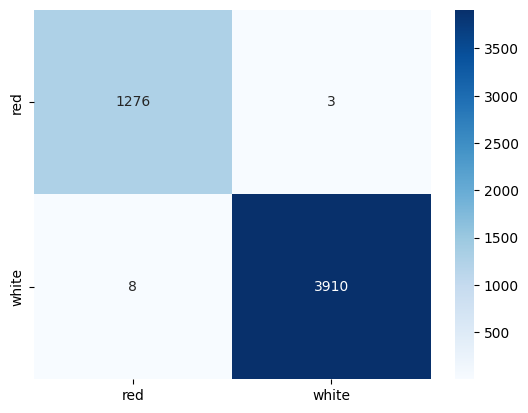

In [79]:
sns.heatmap(data=cm_train, cmap='Blues', annot=True, fmt='d',
            xticklabels=target_names, yticklabels=target_names)
plt.show()

In [80]:
print(classification_report(y_train, train_pred))

              precision    recall  f1-score   support

    red wine       0.99      1.00      1.00      1279
  white wine       1.00      1.00      1.00      3918

    accuracy                           1.00      5197
   macro avg       1.00      1.00      1.00      5197
weighted avg       1.00      1.00      1.00      5197



In [81]:
test_pred =  tree_clf.predict(X_test)   # 테스트 셋 예측값

In [82]:
cm_test = confusion_matrix(y_test, test_pred)
cm_test

array([[226,  94],
       [ 81, 899]])

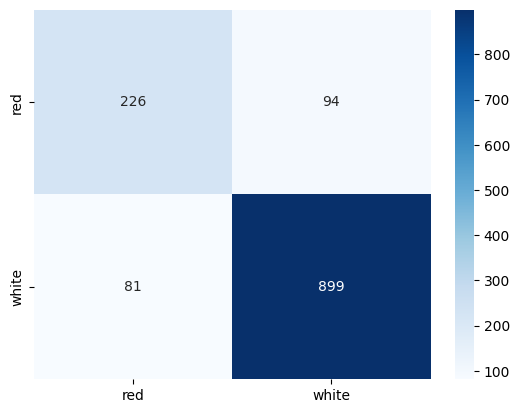

In [83]:
sns.heatmap(data=cm_test, cmap='Blues', annot=True, fmt='d',
            xticklabels=target_names, yticklabels=target_names)
plt.show()

In [84]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

    red wine       0.74      0.71      0.72       320
  white wine       0.91      0.92      0.91       980

    accuracy                           0.87      1300
   macro avg       0.82      0.81      0.82      1300
weighted avg       0.86      0.87      0.86      1300



In [85]:
# 위와 같이 과대적합이 심하고 훈련셋의 정확도는 좋지만 테스트 셋의 정확도가 좋지 않으면
# 규제를 통해 훈련셋의 정확도를 낮추고 테스트 셋의 정확도를 높일 수 있음 + 하이퍼파라미터

Decision Tree는 과대적합이 매우 크다.

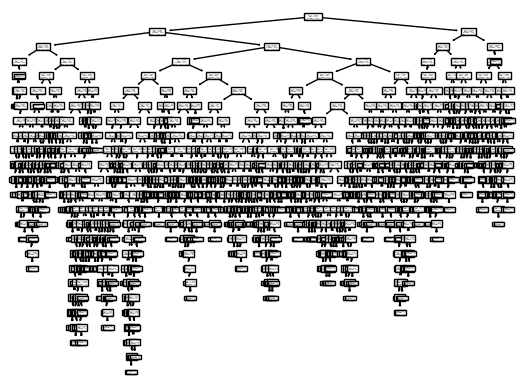

In [87]:
plot_tree(tree_clf)
plt.show()

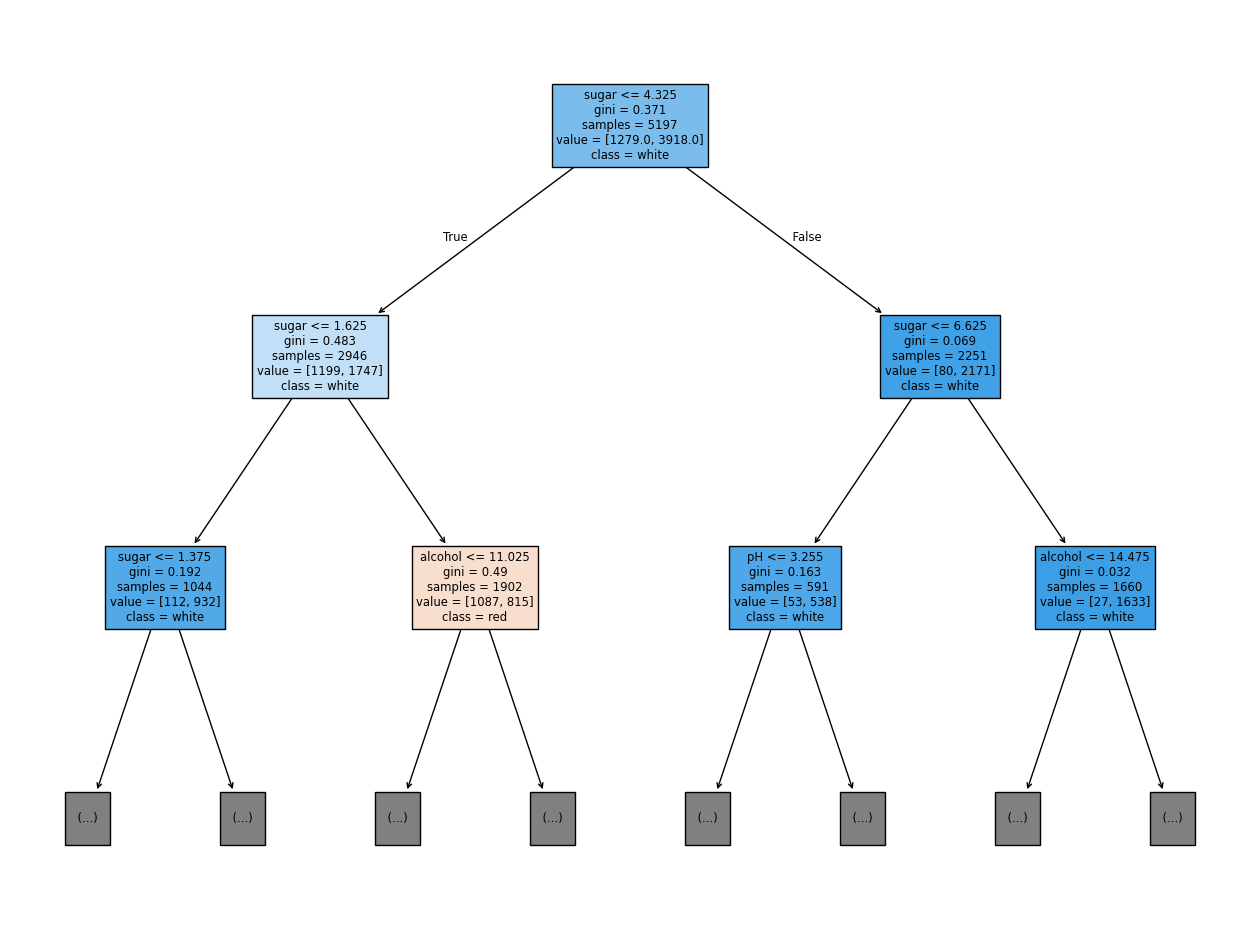

In [91]:
plt.figure(figsize=(16, 12))
plot_tree(tree_clf, max_depth=2, feature_names=feature_names, class_names=target_names,
          filled=True)

plt.show()

## Decision Tree를 나누는 기준

---

__Gini impurity(불순도)__

$$
Gini = 1 - \sum_i p_i^2
$$

*   $p_i$: $i$번째 클래스가 될 확률
*   이진(binary class) 분류
    *   gini = 1 - ((양성 클래스 확률)^2 + (음성 클래스 확률)^2)
    *   양성과 음성의 비율이 1:1인 경우, gini = 1 - (0.5^2 + 0.5^2) = 0.5. 불순도 최대.
    *   양성 또는 음성으로 완벽하게 분류된 경우, gini = 1 - 1 = 0. 불순도 최소.
*   Decision tree는 부모 노드와 자식 노드의 gini 불순도 차이가 가능한 커지도록 가지를 성장시킴.

---

__Entropy(엔트로피)__

$$
Entropy = -\sum_i p_i \log_k (p_i)
$$

*   $k$: 클래스의 개수(이진 분류인 경우, k=2).
*   $p_i$: $i$번째 클래스가 될 확률.
*   이진 분류
    *   양성과 음성의 비율이 1:1인 경우, Entropy = 1. 엔트로피 최대.
    *   양성 또는 음성으로 완벽히 분류된 경우, Entropy = 0. 엔트로피 최소.
*   Decision tree 객체를 생성할 때 criterion='entropy'라고 설정하면, 부모 노드와 자식 노드에서의 엔트로피 차이가 가능하면 커지도록 가지를 생성함.


## Decision Tree 특징

*   장점:
    *   특성들을 스케일링할 필요가 없다.
    *   결과를 이해하기 쉽다.
*   단점:
    *   과적합(overfitting)되기가 쉽다.
    *   여러가지 규제들을 적용해서 과적합 문제를 해결해야 함.
*   규제 하이퍼 파라미터(hyperparameter) - 생성자의 파라미터들
    *   `max_depth`: decision tree의 최대 깊이.
    *   `max_leaf_node`: leaf node의 최댓값.
    *   `max_features`: 각 노드에서 분할에 사용할 특성의 최대 개수.
    *   `min_samples_split`: 노드가 분할되기 위해서 가져야 할 최소 샘플 개수.
    *   `min_samples_leaf`: leaf 노드가 가져야 할 최소 샘플 개수.
    *   `max_`로 시작하는 파라미터의 값을 증가시키면, 트리의 크기가 커짐.
        *   규제가 작아짐.
        *   overfitting이 커짐.
    *   `max_`로 시작하는 파라미터 값을 감소시키면, 트리의 크기가 작아지기 때문에 overfitting이 작아짐.
    *   `min_`으로 시작하는 파라미터 값을 증가시키면, 트리의 크기가 작아짐.
    

## max_depth 파라미터 변화에 따른 정확도

In [169]:
# 최대 깊이가 2인 decision tree
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)

In [170]:
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

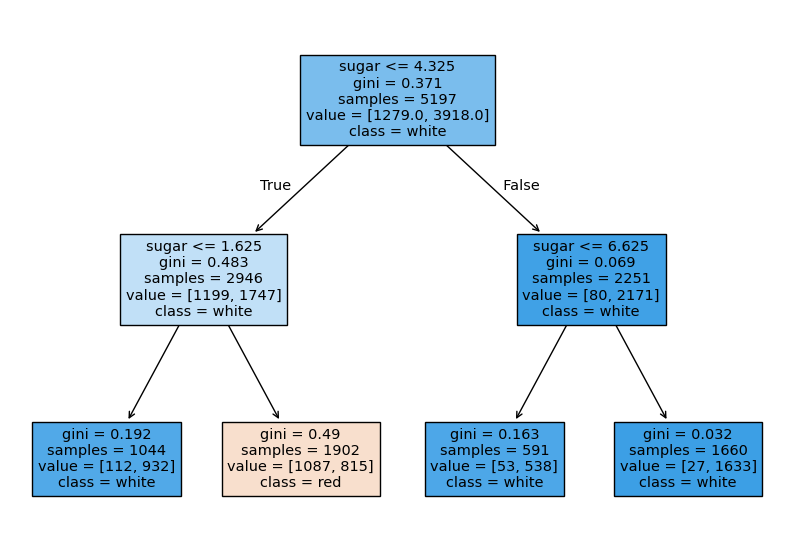

In [171]:
plt.figure(figsize=(10, 7))
plot_tree(tree_clf, filled=True, feature_names=feature_names, class_names=target_names)
plt.show()

In [97]:
print('train acc.:', tree_clf.score(X_train, y_train))
print('test acc.:', tree_clf.score(X_test, y_test))     # max_depth=2로 설정했을 때 훈련, 테스트셋 정확도.

train acc.: 0.8062343659803733
test acc.: 0.8107692307692308


In [98]:
# 최대 깊이가 5인 decision tree
tree_clf = DecisionTreeClassifier(max_depth=5, random_state=42)

In [99]:
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

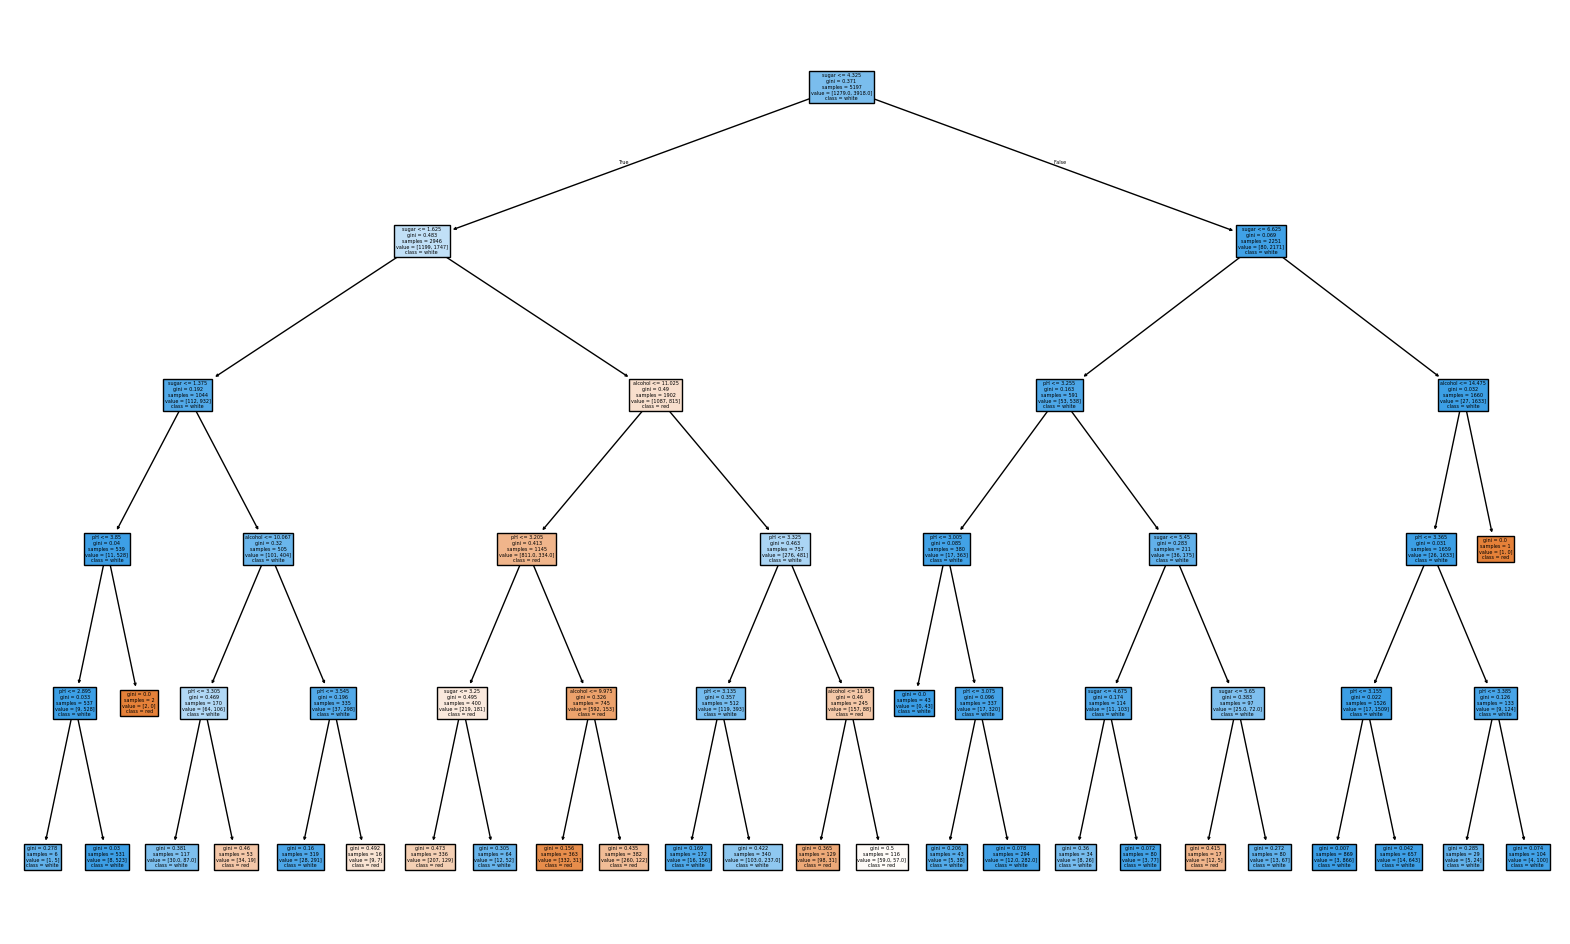

In [102]:
plt.figure(figsize=(20, 12))
plot_tree(tree_clf, feature_names=feature_names, class_names=target_names, filled=True)
plt.show()

In [104]:
print('train acc.:', tree_clf.score(X_train, y_train))
print('test acc.:', tree_clf.score(X_test, y_test))     # max_depth=5일 경우 훈련셋, 테스트셋의 정확도.

train acc.: 0.8718491437367712
test acc.: 0.8576923076923076


In [120]:
# max_depth : 2 ~ 10
depths = np.arange(2, 16)   # max_depth : 2 ~ 15
train_scores = []       # 훈련 셋에서의 정확도를 저장할 리스트
test_scores = []        # 테스트 셋에서의 정확도를 저장할 리스트

for d in depths:
    tree_clf = DecisionTreeClassifier(max_depth=d, random_state=42)     # decision tree 생성
    tree_clf.fit(X_train, y_train)      # 훈련
    train_scores.append(tree_clf.score(X_train, y_train))       # 훈련 셋 정확도
    test_scores.append(tree_clf.score(X_test, y_test))          # 테스트 셋 정확도

print(train_scores)
print(test_scores)

[0.8062343659803733, 0.8458726188185491, 0.8595343467385029, 0.8718491437367712, 0.8778141235328074, 0.8880123147969983, 0.9003271117952665, 0.9124494900904367, 0.9255339619010968, 0.941312295555128, 0.9538195112564941, 0.9680584952857417, 0.9757552434096595, 0.9834519915335771]
[0.8107692307692308, 0.8407692307692308, 0.8523076923076923, 0.8576923076923076, 0.8484615384615385, 0.8515384615384616, 0.8584615384615385, 0.8615384615384616, 0.8615384615384616, 0.8584615384615385, 0.8646153846153846, 0.8623076923076923, 0.8661538461538462, 0.8676923076923077]


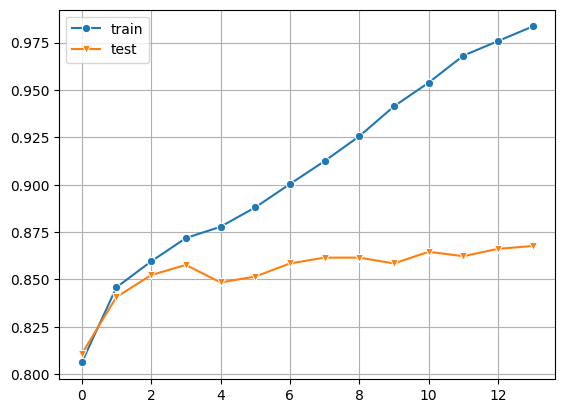

In [121]:
sns.lineplot(data=train_scores, label='train', marker='o')
sns.lineplot(data=test_scores, label='test', marker='v')

plt.legend()
plt.grid()
plt.show()

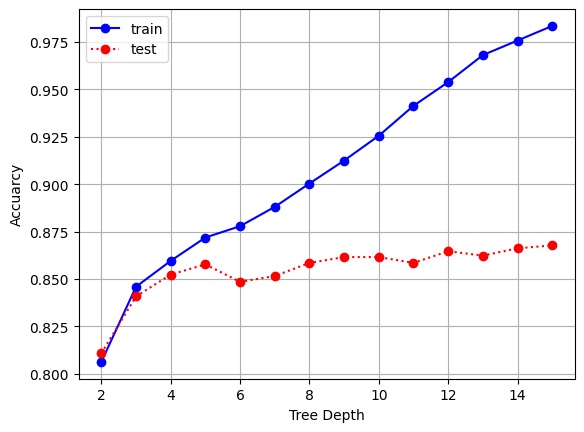

In [122]:
plt.plot(depths, train_scores, 'bo-', label='train')
plt.plot(depths, test_scores, 'ro:', label='test')

plt.xlabel('Tree Depth')
plt.ylabel('Accuarcy')
plt.legend()
plt.grid()
plt.show()

# 하이퍼 파라미터 튜닝

* 전체 데이터를 훈련(train) - 검증(validation) - 테스트(test) 셋으로 나눔.
* 하이퍼 파라미터를 변경하면서 훈련 셋으로 ML 모델을 훈련시킴.
* 하이퍼 파라미터 설정에 따른 성능 테스트는 검증 셋으로 수행.
    * 검증 셋에서 점수가 좋은 (그리고 과대적합이 적은) 하이퍼 파라미터를 선택.
* 튜닝이 끝난 모델의 일반화 성능을 예측하기 위해서 테스트 셋을 사용.

In [130]:
# 전체 데이터셋을 훈련/테스트로 나누기
X_tr_full, X_test, y_tr_full, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)
# 여기서는 target인 red, white를 골고루 섞어주기 위해 stratify=y를 사용.
# -> 전체 데이터셋의 클래스 비율을 훈련셋과 테스트셋에 고르게 분배하기 위해서.

In [131]:
# X_tr_full을 훈련/검증 셋으로 나누기
X_tr, X_vali, y_tr, y_vali = train_test_split(X_tr_full, y_tr_full, test_size=0.20, random_state=42, stratify=y_tr_full)
# 여기서 왜 stratify=y_tr_full이 사용되는지?
# 똑같이 stratify=y를 사용하면 되는것이 아닌지? X
# -> 여기서 분할 대상이 X_tr_full, y_tr_full 이기때문에 반드시 y_tr_full과 동일한 비율을 유지하려면 y_tr_full을 참조해야함.
# -> 만약 y를 참조하면 ValueError가 발생함. 왜냐하면 y는 전체 100%에 대한 데이터셋에 대한 타겟이기 때문임.

In [132]:
depths = np.arange(2, 16)
train_scores = []
vali_scores = []

for d in depths:
    tree_clf = DecisionTreeClassifier(max_depth=d, random_state=42) # max_depth에 따라 모델의 정확도 확인.
    tree_clf.fit(X_tr, y_tr)
    train_scores.append(tree_clf.score(X_tr, y_tr))
    vali_scores.append(tree_clf.score(X_vali, y_vali))

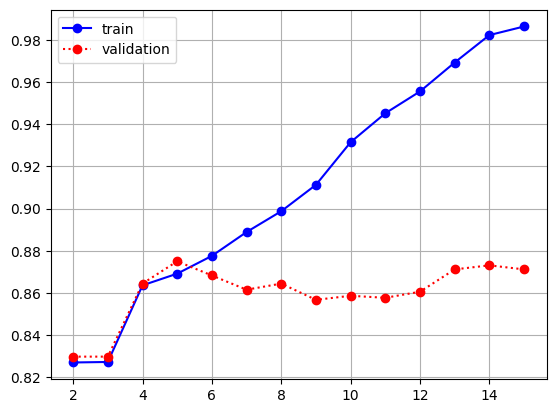

In [134]:
plt.plot(depths, train_scores, 'bo-', label='train')
plt.plot(depths, vali_scores, 'ro:', label='validation')

plt.legend()
plt.grid()
plt.show()

In [135]:
train_scores[4], vali_scores[4] # max_depth=6일때 훈련 셋 정확도, 검증 셋 정확도 출력

(0.8775559297570363, 0.8682692307692308)

## min_sample_split 하이퍼 파라미터 튜닝

In [136]:
min_samples = [0.01, 0.05, 0.1, 0.15, 0.2]
train_scores = []
val_scores = []

for s in min_samples:
    # min_samples_split=0.01 : node를 나누기 위한 기준 - 훈련 셋의 1%
    tree_clf = DecisionTreeClassifier(min_samples_split=s, random_state=42)
    tree_clf.fit(X_tr, y_tr)
    train_scores.append(tree_clf.score(X_tr, y_tr))
    val_scores.append(tree_clf.score(X_vali, y_vali))

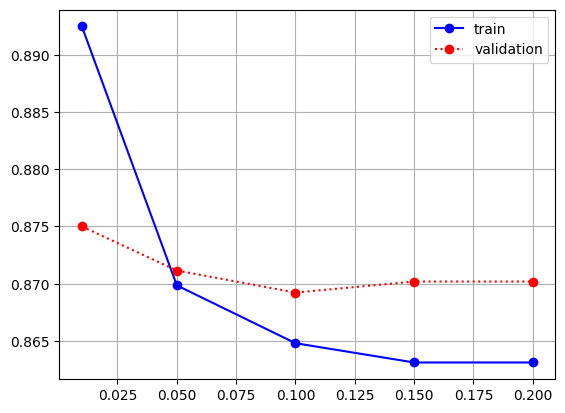

In [137]:
plt.plot(min_samples, train_scores, 'bo-', label='train')
plt.plot(min_samples, val_scores, 'ro:', label='validation')

plt.grid()
plt.legend()
plt.show()

# 교차 검증(Cross Validation)

In [139]:
from sklearn.model_selection import cross_validate, cross_val_score, cross_val_predict

In [140]:
X_tr_full.shape

(5197, 3)

In [141]:
y_tr_full.shape

(5197,)

In [142]:
# 교차 검증에서 사용할 예측기(ML 모델) 생성
clf = DecisionTreeClassifier(max_depth=6, random_state=42)

# 5-fold 교차 검증(cross validation) : 전체 훈련 셋을 5개로 나눠서 그 중 한 개를 검증으로 사용.
# 파라미터 cv : n-fold 교차 검증
# 파라미터 n_jobs : 동시에(병렬로) 수행할 작업 개수. -1이면 CPU의 모든 코어를 사용.
# 파라미터 return_train_score : 훈련 점수를 리턴할 것인 지.
cv = cross_validate(estimator=clf, X=X_tr_full, y=y_tr_full, cv=5, n_jobs=-1, return_train_score=True)

In [144]:
cv  #> cross_validate() 함수의 리턴 값은 dict 객체

{'fit_time': array([0.02948308, 0.01453876, 0.01287317, 0.01278591, 0.01510239]),
 'score_time': array([0.00280309, 0.00285077, 0.00280714, 0.00240707, 0.00267029]),
 'test_score': array([0.87019231, 0.86634615, 0.84889317, 0.86429259, 0.86044273]),
 'train_score': array([0.87466923, 0.8811643 , 0.88455988, 0.88095238, 0.88648389])}

In [147]:
np.mean(cv['train_score'])  # 각 교차 검증에서 훈련 셋 정확도의 평균
#> 교차검증 훈련 셋 점수 평균은 일반적인 훈련 셋 점수와 비슷하거나 약간 좋음.

np.float64(0.8815659371589127)

In [146]:
np.mean(cv['test_score'])   # 각 교차검증에서 검증 셋 정확도의 평균

np.float64(0.8620333900940252)

In [148]:
# n-fold 교차검증에서 각각의 검증 셋에서의 점수(정확도)들
cross_val_score(estimator=clf, X=X_tr_full, y=y_tr_full, cv=5, n_jobs=-1)

array([0.87019231, 0.86634615, 0.84889317, 0.86429259, 0.86044273])

## 교차 검증을 사용한 max_depth 하이퍼 파라미터 튜닝

In [149]:
train_scores = []
val_scores = []
max_depths = np.arange(2, 16)
for d in max_depths:
    tree = DecisionTreeClassifier(max_depth=d, random_state=42)
    cv = cross_validate(tree, X_tr_full, y_tr_full,
                        cv=5, n_jobs=-1, return_train_score=True)
    train_acc = np.mean(cv['train_score'])
    train_scores.append(train_acc)
    test_acc = np.mean(cv['test_score'])
    val_scores.append(test_acc)

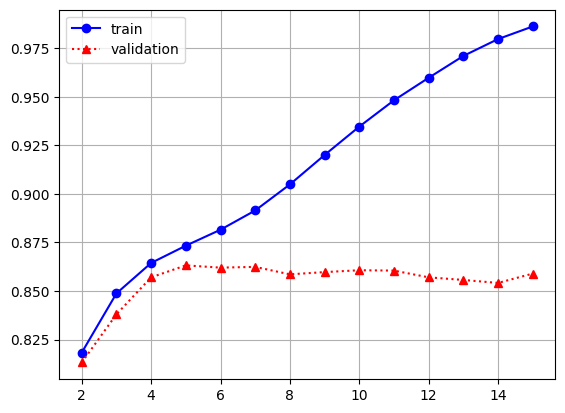

In [151]:
plt.plot(max_depths, train_scores, 'bo-', label='train')
plt.plot(max_depths, val_scores, 'r^:', label='validation')

plt.legend()
plt.grid()
plt.show()

In [152]:
np.max(val_scores)

np.float64(0.8631863108018065)

In [153]:
np.argmax(val_scores)

np.int64(3)

In [154]:
max_depths[np.argmax(val_scores)]

np.int64(5)

# Grid Search Cross Validation

In [155]:
from sklearn.model_selection import GridSearchCV

In [156]:
# 파라미터 튜닝을 하려는 ML 모델(예측기)
tree = DecisionTreeClassifier(random_state=42)

In [157]:
# 튜닝할 하이퍼 파라미터들의 조합을 dict로 만듦. 키는 ML 클래스 생성자의 파라미터 이름을 사용.
params = {'max_depth' : np.arange(2, 21),   # 19 * 49의 조합 수
          'min_samples_split' : np.arange(2, 100, 2)}

In [159]:
# GridSearchCV 객체 생성
grid_cv = GridSearchCV(estimator=tree, param_grid=params, n_jobs=-1)

In [160]:
# 훈련 -> 5-fold 교차 검증 수행하면서 최적의 파라미터 조합을 찾음.
grid_cv.fit(X_tr_full, y_tr_full)       # 테스트는 모든게 끝나고 마지막에 최종 확인을 위해 쓰임.

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20]),
                         'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
       36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68,
       70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98])})

In [162]:
grid_cv.best_params_    # 교차 검증의 test_score를 최대로 만들어 주는 파라미터 조합

{'max_depth': np.int64(7), 'min_samples_split': np.int64(84)}

In [164]:
grid_cv.best_score_     # 교차 검증에서 test_score 최댓값

np.float64(0.867805767379877)

In [166]:
best_tree = grid_cv.best_estimator_
best_tree

DecisionTreeClassifier(max_depth=np.int64(7), min_samples_split=np.int64(84),
                       random_state=42)

최종 테스트 진행.

In [168]:
best_tree.score(X_test, y_test)

0.8476923076923077